## Learning Data Augmentation

In [285]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torchvision

import datasets
import autoencoder
import cnn
import vae
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

Files already downloaded and verified
Files already downloaded and verified


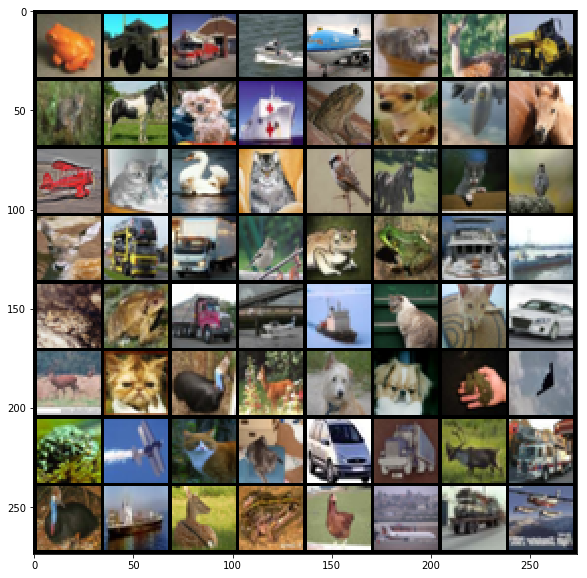

Train: 5000 Test: 5000 Input: torch.Size([64, 3, 32, 32]) Target: torch.Size([64])


In [404]:
trn_dset, tst_dset = datasets.get_cifar_dataset(trn_size=5000, tst_size=5000)
trn_loader, tst_loader = datasets.get_cifar_loader(trn_dset, tst_dset, batch_size=64)
inputs,targets = next(iter(trn_loader))
utils.plot_batch(inputs)
print("Train:", len(trn_loader.dataset), "Test:", len(tst_loader.dataset), 
      "Input:", inputs.size(), "Target:", targets.size())

## Classifier

In [219]:
model = cnn.CNN(in_shape=(3,32,32), n_classes=10).cuda()

In [221]:
epochs = 20
iters = epochs * len(trn_loader)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
lr_adjuster = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
trainer = cnn.Trainer(optimizer, lr_adjuster)

In [222]:
trainer.run(model, trn_loader, tst_loader, criterion, epochs)

Epoch 1, TrnLoss: 1.983, TrnAcc: 0.515, TstLoss: 1.846, TstAcc: 0.644
Epoch 2, TrnLoss: 1.833, TrnAcc: 0.654, TstLoss: 1.784, TstAcc: 0.700
Epoch 3, TrnLoss: 1.785, TrnAcc: 0.699, TstLoss: 1.758, TstAcc: 0.723
Epoch 4, TrnLoss: 1.760, TrnAcc: 0.724, TstLoss: 1.745, TstAcc: 0.736
Epoch 5, TrnLoss: 1.749, TrnAcc: 0.735, TstLoss: 1.740, TstAcc: 0.740
Epoch 6, TrnLoss: 1.744, TrnAcc: 0.740, TstLoss: 1.738, TstAcc: 0.743
Epoch 7, TrnLoss: 1.741, TrnAcc: 0.742, TstLoss: 1.737, TstAcc: 0.742
Epoch 8, TrnLoss: 1.739, TrnAcc: 0.744, TstLoss: 1.736, TstAcc: 0.741
Epoch 9, TrnLoss: 1.740, TrnAcc: 0.745, TstLoss: 1.737, TstAcc: 0.740
Epoch 10, TrnLoss: 1.739, TrnAcc: 0.744, TstLoss: 1.737, TstAcc: 0.741
Epoch 11, TrnLoss: 1.738, TrnAcc: 0.745, TstLoss: 1.736, TstAcc: 0.742
Epoch 12, TrnLoss: 1.738, TrnAcc: 0.745, TstLoss: 1.736, TstAcc: 0.743
Epoch 13, TrnLoss: 1.738, TrnAcc: 0.745, TstLoss: 1.737, TstAcc: 0.741
Epoch 14, TrnLoss: 1.739, TrnAcc: 0.745, TstLoss: 1.737, TstAcc: 0.741
Epoch 15, TrnLo

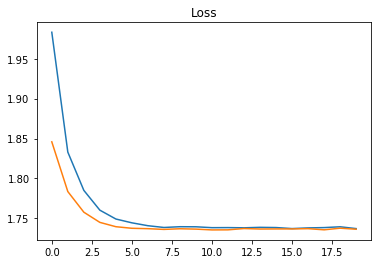

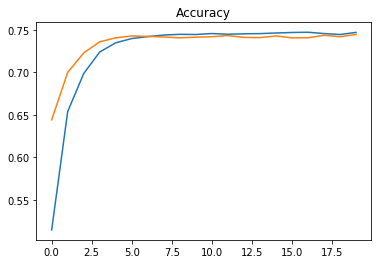

In [223]:
utils.plot_metric(trainer.metrics['loss']['trn'], trainer.metrics['loss']['tst'], 'Loss')
utils.plot_metric(trainer.metrics['accuracy']['trn'], trainer.metrics['accuracy']['tst'], 'Accuracy')

## Autoencoder

In [262]:
model = autoencoder.ConvAE(in_shape=(3,32,32)).cuda()

In [245]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)

Epoch 1 Loss: 0.0566


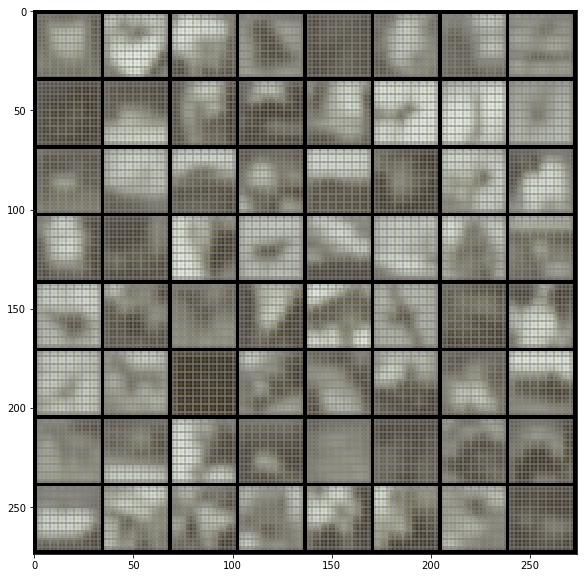

Epoch 2 Loss: 0.0223
Epoch 3 Loss: 0.0154
Epoch 4 Loss: 0.0142
Epoch 5 Loss: 0.0137
Epoch 6 Loss: 0.0134
Epoch 7 Loss: 0.0133
Epoch 8 Loss: 0.0131
Epoch 9 Loss: 0.0130
Epoch 10 Loss: 0.0128
Epoch 11 Loss: 0.0128
Epoch 12 Loss: 0.0128
Epoch 13 Loss: 0.0126
Epoch 14 Loss: 0.0126
Epoch 15 Loss: 0.0125
Epoch 16 Loss: 0.0125
Epoch 17 Loss: 0.0124
Epoch 18 Loss: 0.0124
Epoch 19 Loss: 0.0123
Epoch 20 Loss: 0.0122
Epoch 21 Loss: 0.0121
Epoch 22 Loss: 0.0120
Epoch 23 Loss: 0.0118
Epoch 24 Loss: 0.0112
Epoch 25 Loss: 0.0102
Epoch 26 Loss: 0.0094
Epoch 27 Loss: 0.0091
Epoch 28 Loss: 0.0090
Epoch 29 Loss: 0.0089
Epoch 30 Loss: 0.0089
Epoch 31 Loss: 0.0088
Epoch 32 Loss: 0.0088
Epoch 33 Loss: 0.0087
Epoch 34 Loss: 0.0087
Epoch 35 Loss: 0.0087
Epoch 36 Loss: 0.0087
Epoch 37 Loss: 0.0086
Epoch 38 Loss: 0.0086
Epoch 39 Loss: 0.0086
Epoch 40 Loss: 0.0086
Epoch 41 Loss: 0.0086
Epoch 42 Loss: 0.0086
Epoch 43 Loss: 0.0086
Epoch 44 Loss: 0.0086
Epoch 45 Loss: 0.0086
Epoch 46 Loss: 0.0085
Epoch 47 Loss: 0.0

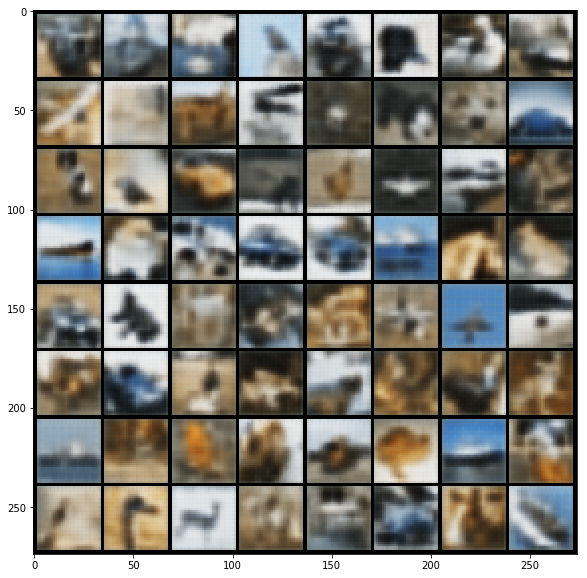

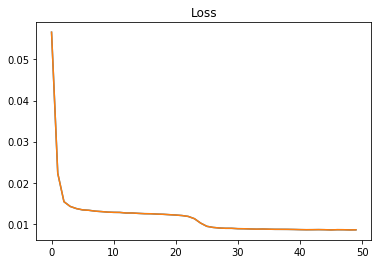

In [246]:
losses = autoencoder.run(model, trn_loader, criterion, optimizer, epochs=50)
utils.plot_metric(losses, losses, 'Loss')

## VAE

In [405]:
model = vae.VAE(in_shape=(3,32,32), n_latent=100).cuda()

In [406]:
criterion = nn.MSELoss(size_average=False)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=5e-4)

Epoch 1, TrnLoss: 6966.2139, TstLoss: 4245.5043


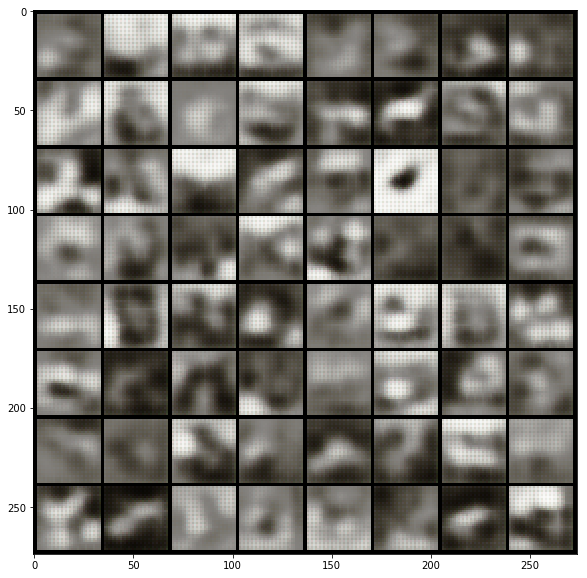

Epoch 2, TrnLoss: 3783.6823, TstLoss: 3464.6292
Epoch 3, TrnLoss: 3261.6275, TstLoss: 3207.0224
Epoch 4, TrnLoss: 2996.9156, TstLoss: 2759.2888
Epoch 5, TrnLoss: 2514.0643, TstLoss: 2658.0470
Epoch 6, TrnLoss: 2290.9931, TstLoss: 2211.7533
Epoch 7, TrnLoss: 2151.9064, TstLoss: 2388.2013
Epoch 8, TrnLoss: 2057.0929, TstLoss: 2088.1799
Epoch 9, TrnLoss: 1980.0051, TstLoss: 2037.6166
Epoch 10, TrnLoss: 1941.4016, TstLoss: 2047.0054
Epoch 11, TrnLoss: 1907.5970, TstLoss: 2056.5234
Epoch 12, TrnLoss: 1862.3178, TstLoss: 1902.3538
Epoch 13, TrnLoss: 1815.1743, TstLoss: 1768.9928
Epoch 14, TrnLoss: 1795.3046, TstLoss: 1779.2972
Epoch 15, TrnLoss: 1753.5660, TstLoss: 1773.2156
Epoch 16, TrnLoss: 1746.5666, TstLoss: 1717.7845
Epoch 17, TrnLoss: 1700.6774, TstLoss: 1750.5426
Epoch 18, TrnLoss: 1657.3328, TstLoss: 1839.3230
Epoch 19, TrnLoss: 1623.3133, TstLoss: 1668.0557
Epoch 20, TrnLoss: 1629.4845, TstLoss: 2050.8171
Epoch 21, TrnLoss: 1586.8835, TstLoss: 1597.6600
Epoch 22, TrnLoss: 1597.9499

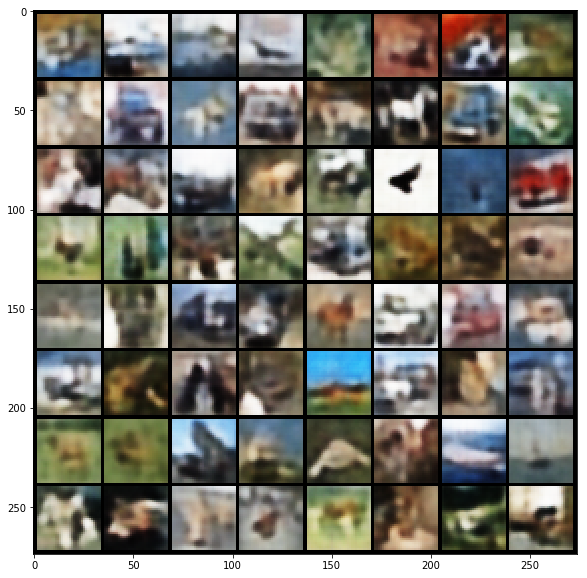

Epoch 27, TrnLoss: 1520.9113, TstLoss: 1643.4518
Epoch 28, TrnLoss: 1524.7018, TstLoss: 1783.3694
Epoch 29, TrnLoss: 1535.4499, TstLoss: 1556.6808
Epoch 30, TrnLoss: 1531.1009, TstLoss: 1552.1584
Epoch 31, TrnLoss: 1502.2871, TstLoss: 1510.8314
Epoch 32, TrnLoss: 1504.5473, TstLoss: 1545.2988
Epoch 33, TrnLoss: 1505.6871, TstLoss: 1518.5609
Epoch 34, TrnLoss: 1502.4120, TstLoss: 1557.6122
Epoch 35, TrnLoss: 1486.7379, TstLoss: 1514.3614
Epoch 36, TrnLoss: 1487.0902, TstLoss: 1561.2190
Epoch 37, TrnLoss: 1506.0345, TstLoss: 1576.8817
Epoch 38, TrnLoss: 1512.8164, TstLoss: 1536.9492
Epoch 39, TrnLoss: 1496.0061, TstLoss: 1521.2845
Epoch 40, TrnLoss: 1481.1228, TstLoss: 1655.3474
Epoch 41, TrnLoss: 1485.7828, TstLoss: 1546.0716
Epoch 42, TrnLoss: 1434.0563, TstLoss: 1523.8973
Epoch 43, TrnLoss: 1456.1313, TstLoss: 1503.3049
Epoch 44, TrnLoss: 1435.1039, TstLoss: 1505.2973
Epoch 45, TrnLoss: 1440.1468, TstLoss: 1513.6340
Epoch 46, TrnLoss: 1447.1891, TstLoss: 1537.8431
Epoch 47, TrnLoss: 1

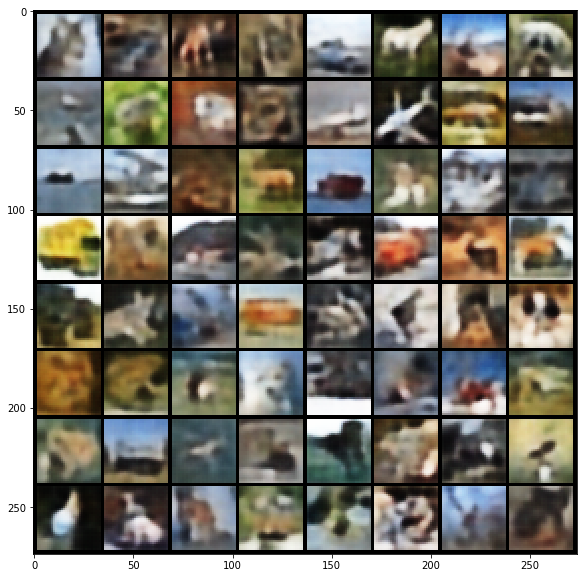

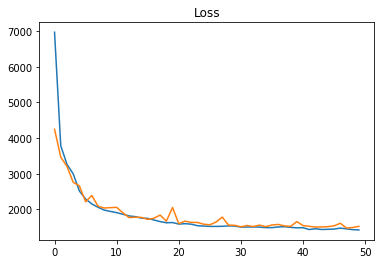

In [407]:
losses = vae.run(model, trn_loader, tst_loader, criterion, 
                 optimizer, epochs=50, plot_interval=25)
utils.plot_metric(losses['trn'], losses['tst'], 'Loss')

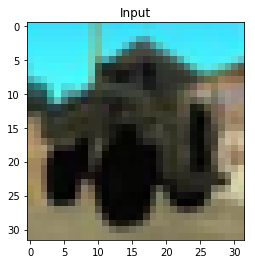

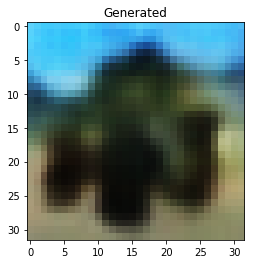

In [408]:
# Single Image
img_idx = 1
noise = 1. + torch.randn(1) * 1e-1 
recon, mean, var = vae.predict(model, inputs[img_idx])
out = vae.generate(model, mean*noise, var*noise)
utils.plot_tensor(inputs[img_idx], title="Input", fs=(4,4))
utils.plot_tensor(out, title="Generated", fs=(4,4))

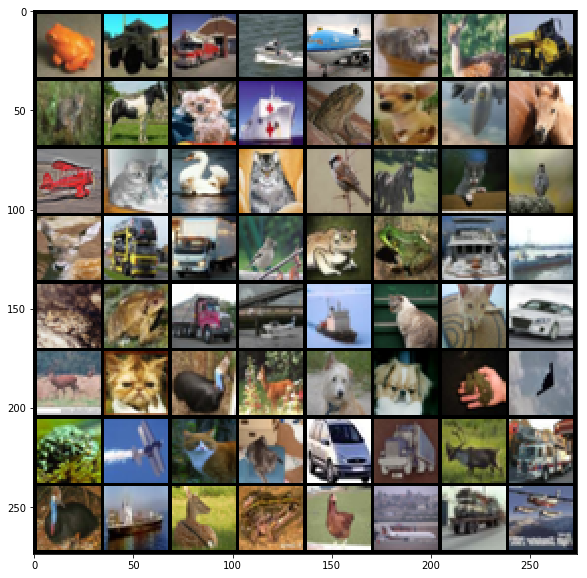

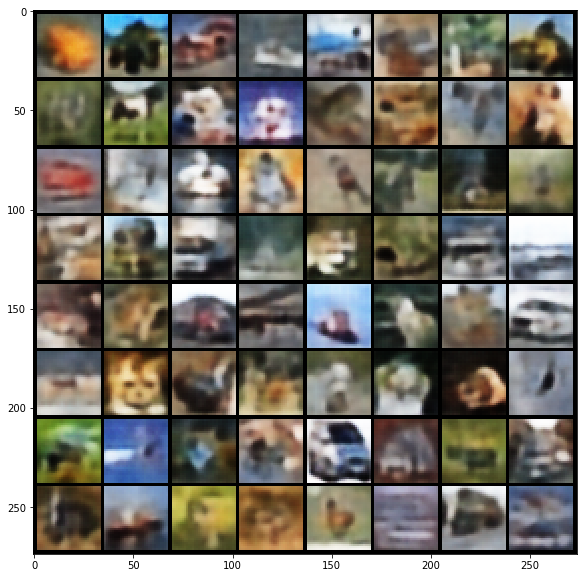

In [409]:
# Batch
recon, mean, var = vae.predict(model, inputs)
out = vae.generate(model, mean, var)
utils.plot_batch(inputs)
utils.plot_batch(out)

## Classifier w VAE Augmentation

In [410]:
augmentor = model
classifier = cnn.CNN(in_shape=(3,32,32), n_classes=10).cuda()

In [411]:
epochs = 50
optimizer = torch.optim.Adam(classifier.parameters(), lr=1e-3, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_adjuster = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.999)
trainer = cnn.Trainer(optimizer, lr_adjuster, augmentor)

In [414]:
trainer.run(classifier, trn_loader, tst_loader, criterion, epochs)

Epoch 1, TrnLoss: 2.213, TrnAcc: 0.305, TstLoss: 2.155, TstAcc: 0.375
Epoch 2, TrnLoss: 2.123, TrnAcc: 0.389, TstLoss: 2.085, TstAcc: 0.415
Epoch 3, TrnLoss: 2.065, TrnAcc: 0.439, TstLoss: 2.052, TstAcc: 0.428
Epoch 4, TrnLoss: 2.033, TrnAcc: 0.463, TstLoss: 2.026, TstAcc: 0.461
Epoch 5, TrnLoss: 2.003, TrnAcc: 0.492, TstLoss: 2.014, TstAcc: 0.464
Epoch 6, TrnLoss: 1.991, TrnAcc: 0.494, TstLoss: 1.994, TstAcc: 0.479
Epoch 7, TrnLoss: 1.966, TrnAcc: 0.514, TstLoss: 1.986, TstAcc: 0.490
Epoch 8, TrnLoss: 1.949, TrnAcc: 0.537, TstLoss: 1.961, TstAcc: 0.514
Epoch 9, TrnLoss: 1.933, TrnAcc: 0.549, TstLoss: 1.954, TstAcc: 0.519
Epoch 10, TrnLoss: 1.920, TrnAcc: 0.563, TstLoss: 1.950, TstAcc: 0.528
Epoch 11, TrnLoss: 1.898, TrnAcc: 0.589, TstLoss: 1.949, TstAcc: 0.533
Epoch 12, TrnLoss: 1.893, TrnAcc: 0.596, TstLoss: 1.945, TstAcc: 0.531
Epoch 13, TrnLoss: 1.877, TrnAcc: 0.609, TstLoss: 1.940, TstAcc: 0.532
Epoch 14, TrnLoss: 1.864, TrnAcc: 0.627, TstLoss: 1.931, TstAcc: 0.547
Epoch 15, TrnLo

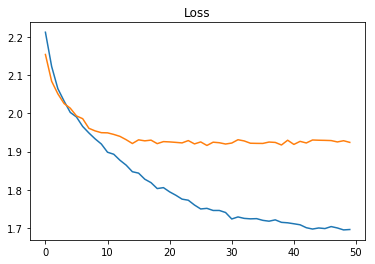

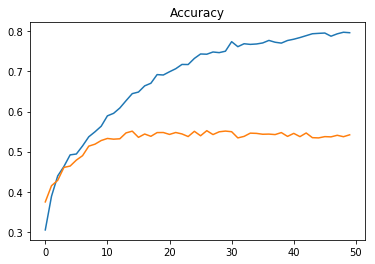

In [415]:
utils.plot_metric(trainer.metrics['loss']['trn'], trainer.metrics['loss']['tst'], 'Loss')
utils.plot_metric(trainer.metrics['accuracy']['trn'], trainer.metrics['accuracy']['tst'], 'Accuracy')

## GAN

In [416]:
# https://arxiv.org/abs/1711.04340